In [1]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
import scipy.stats as st
%matplotlib inline

import analyzer 
import subject
import visualization
import seaborn as sns
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)

<module 'visualization' from 'C:\\Users\\renee\\Documents\\GitHub\\iFEED_experiment_result_analysis_2019\\visualization.py'>

Set file paths

In [2]:
rootPath = 'C:\\Users\\renee\\Documents\\GitHub\\iFEED_experiment_result_analysis_2019\\data'

In [3]:
surveyDataFilePath = os.path.join(rootPath, 'survey.csv')
jsonFilesRootPath = os.path.join(rootPath, 'log')

Initialize the analyzer

In [4]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, jsonFilesRootPath)

In [5]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]


In [6]:
g1 = [s0]
g2 = [s1]
f = [s0,s1]

In [7]:
x=s0.learning_self_assessment_data
print(x)

[2, 2, 3, 3]


In [8]:
y=s1.learning_self_assessment_data
print(y)

[5, 3, 3, 3]


In [9]:
s0.feature_preference_data

{'generalization': [2, 2, 2],
 'generalizationPlusException': [1, 1],
 'parity': [2, 1, 1, 1]}

In [10]:
s1.feature_preference_data['generalization']

[2, 1, 1]

In [11]:
visualizer = visualization.Visualizer([g1,g2], ['a','p'])

[[<subject.Subject object at 0x000002CC27F08908>], [<subject.Subject object at 0x000002CC27E8EEF0>]]


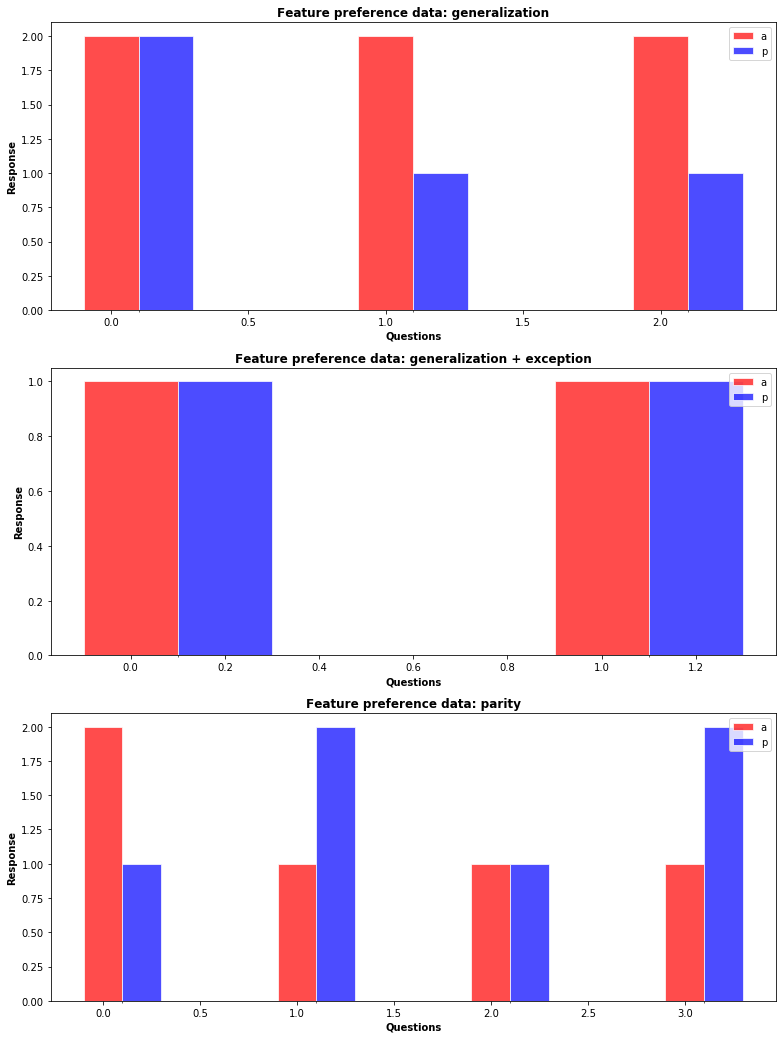

In [12]:
visualizer.featurePrefPlot()


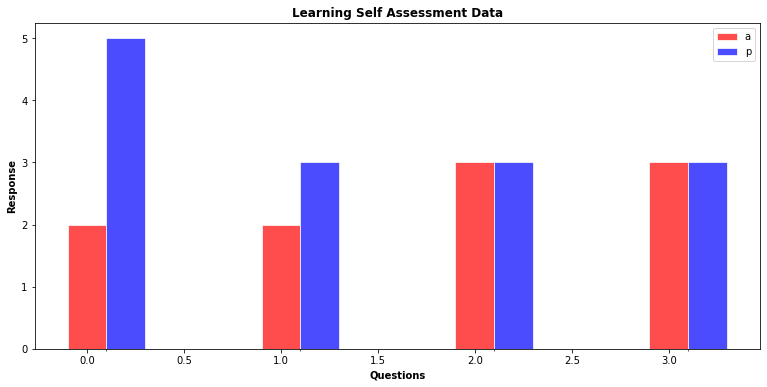

In [13]:
visualizer.selfAssessmentPlot()

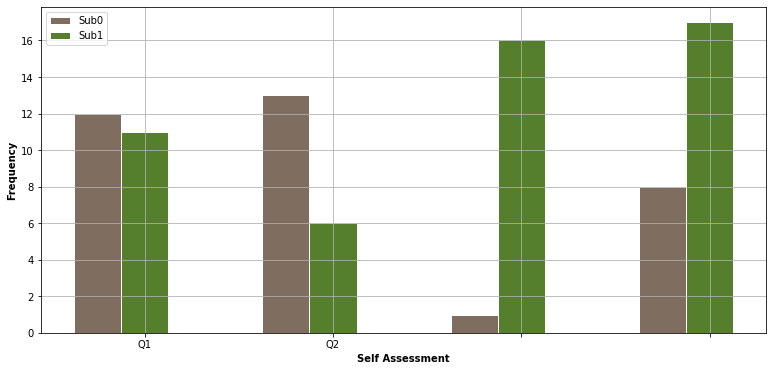

In [14]:
fig, ax = plt.subplots(figsize=(13,6))

# set width of bar
barWidth = 0.25
 
# set height of bar
q1 = [12, 13, 1, 8]
q2 = [11, 6, 16, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(q1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, q1, color='#7f6d5f', width=barWidth, edgecolor='white', label = 'Sub0')
plt.bar(r2, q2, color='#557f2d', width=barWidth, edgecolor='white', label = 'Sub1')
 
# Add xticks on the middle of the group bars
plt.xlabel('Self Assessment', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
ax.grid(True)
plt.xticks([r + barWidth for r in range(len(q1))], ['Q1', 'Q2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [15]:
x = np.zeros((2,3))
a = [0, 1, 2]
b = [3, 4, 5]
l = [a, b]


for d, i in enumerate(l):
    print(i)
    x[d] = i
    
#x[d]=[1, 2, 3]
print(x)

[0, 1, 2]
[3, 4, 5]
[[0. 1. 2.]
 [3. 4. 5.]]


In [16]:
a=np.arange(2)

for i, ele in enumerate(a):
    b = a + 2*i
    print(i, b)

0 [0 1]
1 [2 3]


In [17]:
# group of subject input?
group=[s0,s1]

Question2=[]
for subject in group:
    n=subject.feature_preference_data['generalization'][1]
    Question2.append(n)
    
print(Question2)

[2, 1]


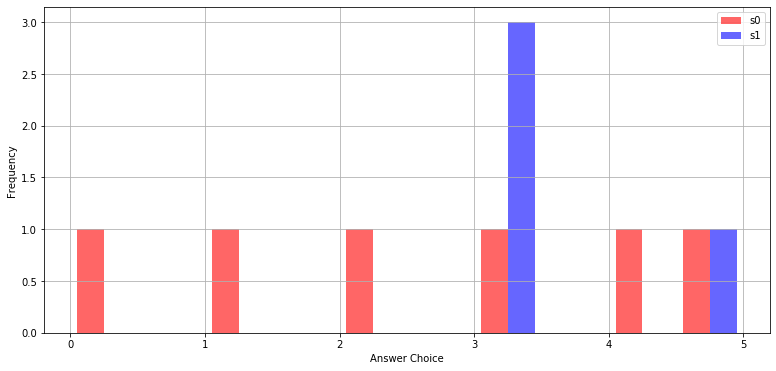

In [18]:
fig, ax = plt.subplots(figsize=(13,6))
hist = plt.hist([x, y], color=['r','b'], alpha=0.6)
    
ax.legend(['s0','s1'])
ax.grid(True)
ax.set_xlabel('Answer Choice')
ax.set_ylabel('Frequency')
plt.show()

In [19]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(70)

In [20]:
sns.set();
sns.distplot([x,y], color)


NameError: name 'color' is not defined

In [ ]:
s0.feature_synthesis_task_data['features_found']
s0.design_synthesis_task_data
s0.feature_synthesis_task_data

In [ ]:
for j in range(2):
    print(j)

In [ ]:
s0.demographic_data

In [ ]:
s1.demographic_data

In [ ]:
def majorDemographicString(argument): 
    switcher = {  
        1: "Aerospace Engineering", 
        2: "Biological / Agricultural / Biomedial Engineering", 
        3: "Chemical Engineering",
        4: "Civil / Environmental Engineering",
        5: "Computer Science / Information Science",
        6: "Electrical Engineering",
        7: "Industrial / Systems Engineering",
        8: "Mechanical Engineering",
        9: "Mathematics / Statistics",
        10: "Physics",
        11: "Chemistry",
        12: "Biological Science",
        13: "Other",
    } 

    return switcher.get(argument, "nothing") 

In [ ]:
Major=s0.demographic_data['major']
print(Major[1])
Major2=Major.split(',')
print(Major2)
MajorIntList=[int(i) for i in Major2]
print(MajorIntList)
type(MajorIntList)

In [ ]:
MajorStringList=MajorIntList
for w in range(len(MajorIntList)):
    print(w)
    MajorStringList[w]=majorDemographicString(MajorIntList[w]) 
print(MajorStringList)
concatMajor=', '.join(MajorStringList)

In [ ]:
s0.demographic_data['major']=concatMajor
s0.demographic_data

In [ ]:
subjects=resultAnalyzer.subjects
majorArray=[1,2]
print(majorArray[0])

In [ ]:
for i in majorArray:
    majorTest=majorDemographicString(majorArray[i-1])
    print(majorTest)
    print(i)


In [ ]:
def employerTypeDemographicString(argument): 
    switcher = {  
        1: "For profit", 
        2: "Non-profit (non-profit research organization, government contractor, etc.)", 
        3: "Government",
        4: "Academic institution",
        5: "Other",
    } 

    return switcher.get(argument, "nothing") 

In [ ]:
employerTest=employerTypeDemographicString(1)
print(employerTest)

In [ ]:
s0.feature_synthesis_task_data['features_found']

In [ ]:
print(s1.feature_classification_graded_answers)
print(s1.feature_comparison_graded_answers)
print(s1.design_classification_graded_answers)
print(s1.design_comparison_graded_answers)

In [ ]:
print(s0.feature_classification_graded_answers)
print(s0.feature_comparison_graded_answers)
print(s0.design_classification_graded_answers)
print(s0.design_comparison_graded_answers)

In [ ]:
s0.feature_synthesis_task_data['features_found']
s0.design_synthesis_task_data
s0.feature_synthesis_task_data
g1 = [s0]
g2 = [s2]
g3 = [s3]
visualizer = visualization.Visualizer([g1,g2,g3], ['r','a','p'])
visualizer.designSynthesisScatter()
